In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
import sklearn
import math
from sklearn.metrics import mean_squared_error, r2_score

2024-09-26 02:39:16.009543: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## EDA

In [2]:
df = pd.read_csv('Concrete_Data.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


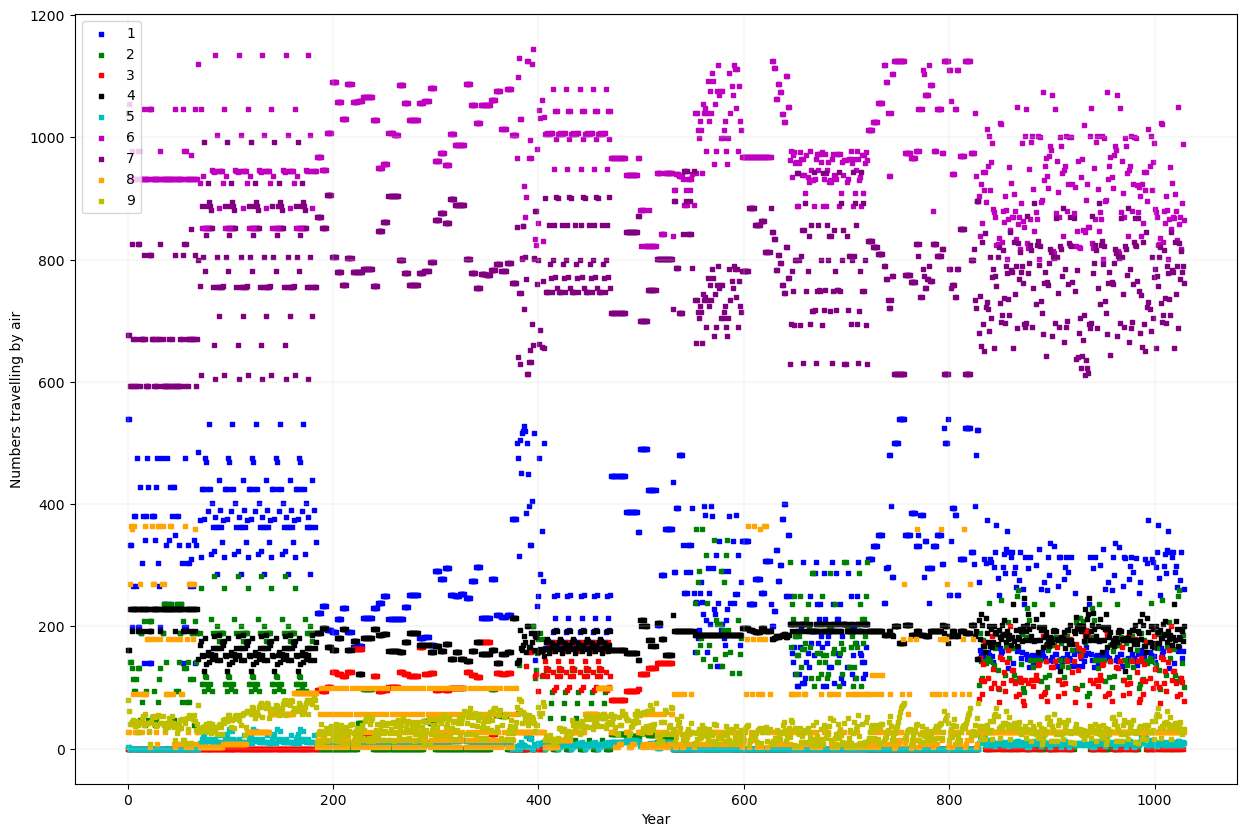

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df.index, df["Cement (component 1)(kg in a m^3 mixture)"], s=10, c='b', marker="s", label='1')
ax.scatter(df.index, df["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"], s=10, c='g', marker="s", label='2')
ax.scatter(df.index, df["Fly Ash (component 3)(kg in a m^3 mixture)"], s=10, c='r', marker="s", label='3')
ax.scatter(df.index, df["Water  (component 4)(kg in a m^3 mixture)"], s=10, c='black', marker="s", label='4')
ax.scatter(df.index, df["Superplasticizer (component 5)(kg in a m^3 mixture)"], s=10, c='c', marker="s", label='5')
ax.scatter(df.index, df["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"], s=10, c='m', marker="s", label='6')
ax.scatter(df.index, df["Fine Aggregate (component 7)(kg in a m^3 mixture)"], s=10, c='purple', marker="s", label='7')
ax.scatter(df.index, df["Age (day)"], s=10, c='orange', marker="s", label='8')
ax.scatter(df.index, df["Concrete compressive strength(MPa, megapascals) "], s=10, c="y", marker="s", label='9')

# plt.savefig('decades.png')
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Numbers travelling by air")
plt.grid(color='lightgrey', linewidth=0.25)
# plt.savefig('scatter')
plt.show() 

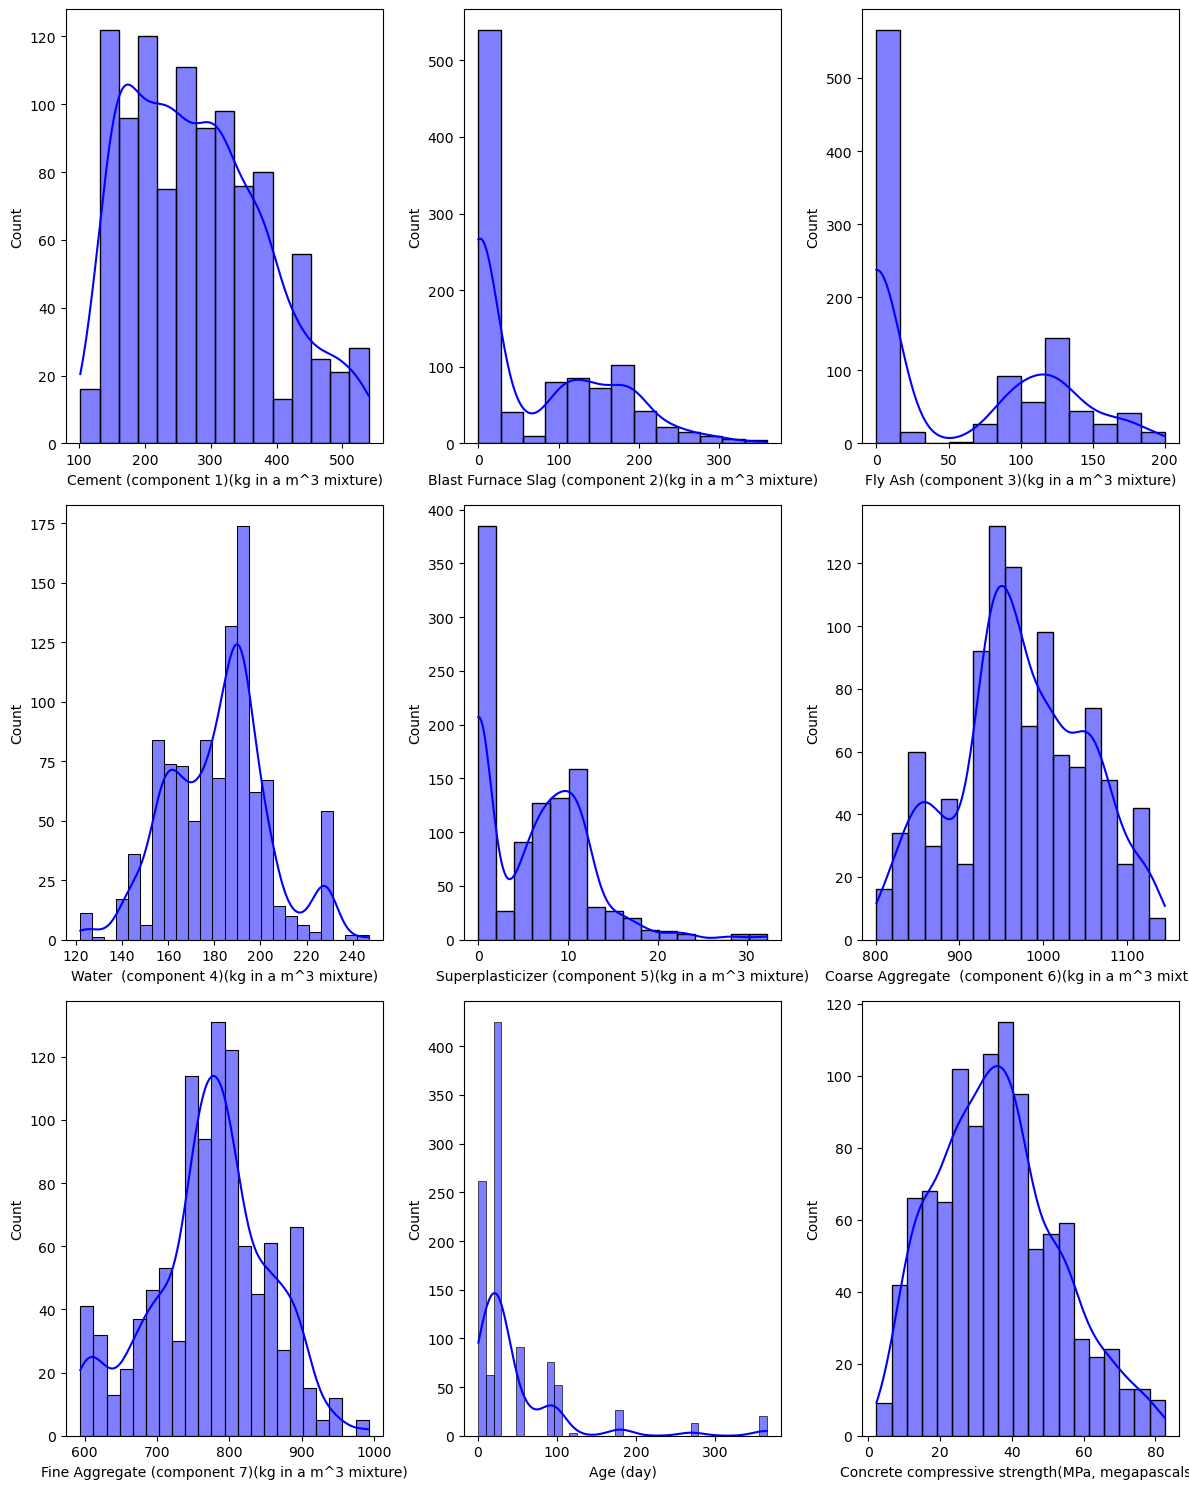

In [9]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(3, 3, figsize=(12, 15))

# Plot each histogram on its own subplot
sns.histplot(data=df, x="Cement (component 1)(kg in a m^3 mixture)", kde=True, label='1', color='b', ax=axes[0, 0])
sns.histplot(data=df, x="Blast Furnace Slag (component 2)(kg in a m^3 mixture)", kde=True, label='2', color='b', ax=axes[0, 1])
sns.histplot(data=df, x="Fly Ash (component 3)(kg in a m^3 mixture)", kde=True, label='2', color='b', ax=axes[0, 2])
sns.histplot(data=df, x="Water  (component 4)(kg in a m^3 mixture)", kde=True, label='3', color='b', ax=axes[1, 0])
sns.histplot(data=df, x="Superplasticizer (component 5)(kg in a m^3 mixture)", kde=True, label='4', color='b', ax=axes[1, 1])
sns.histplot(data=df, x="Coarse Aggregate  (component 6)(kg in a m^3 mixture)", kde=True, label='5', color='b', ax=axes[1, 2])
sns.histplot(data=df, x="Fine Aggregate (component 7)(kg in a m^3 mixture)", kde=True, label='6', color='b', ax=axes[2, 0])
sns.histplot(data=df, x="Age (day)", kde=True, label='7', color='b', ax=axes[2, 1])
sns.histplot(data=df, x="Concrete compressive strength(MPa, megapascals) ", kde=True, label='8', color='b', ax=axes[2, 2])



# Add legend to each subplot
# for ax_row in axes:
#     for ax in ax_row:
#         ax.legend(loc='upper right')
#         ax.grid(color='lightgrey', linewidth=0.25)

# Adjust layout
plt.tight_layout()

# Show the plot
#plt.savefig('livestock_histograms.png')
plt.show()

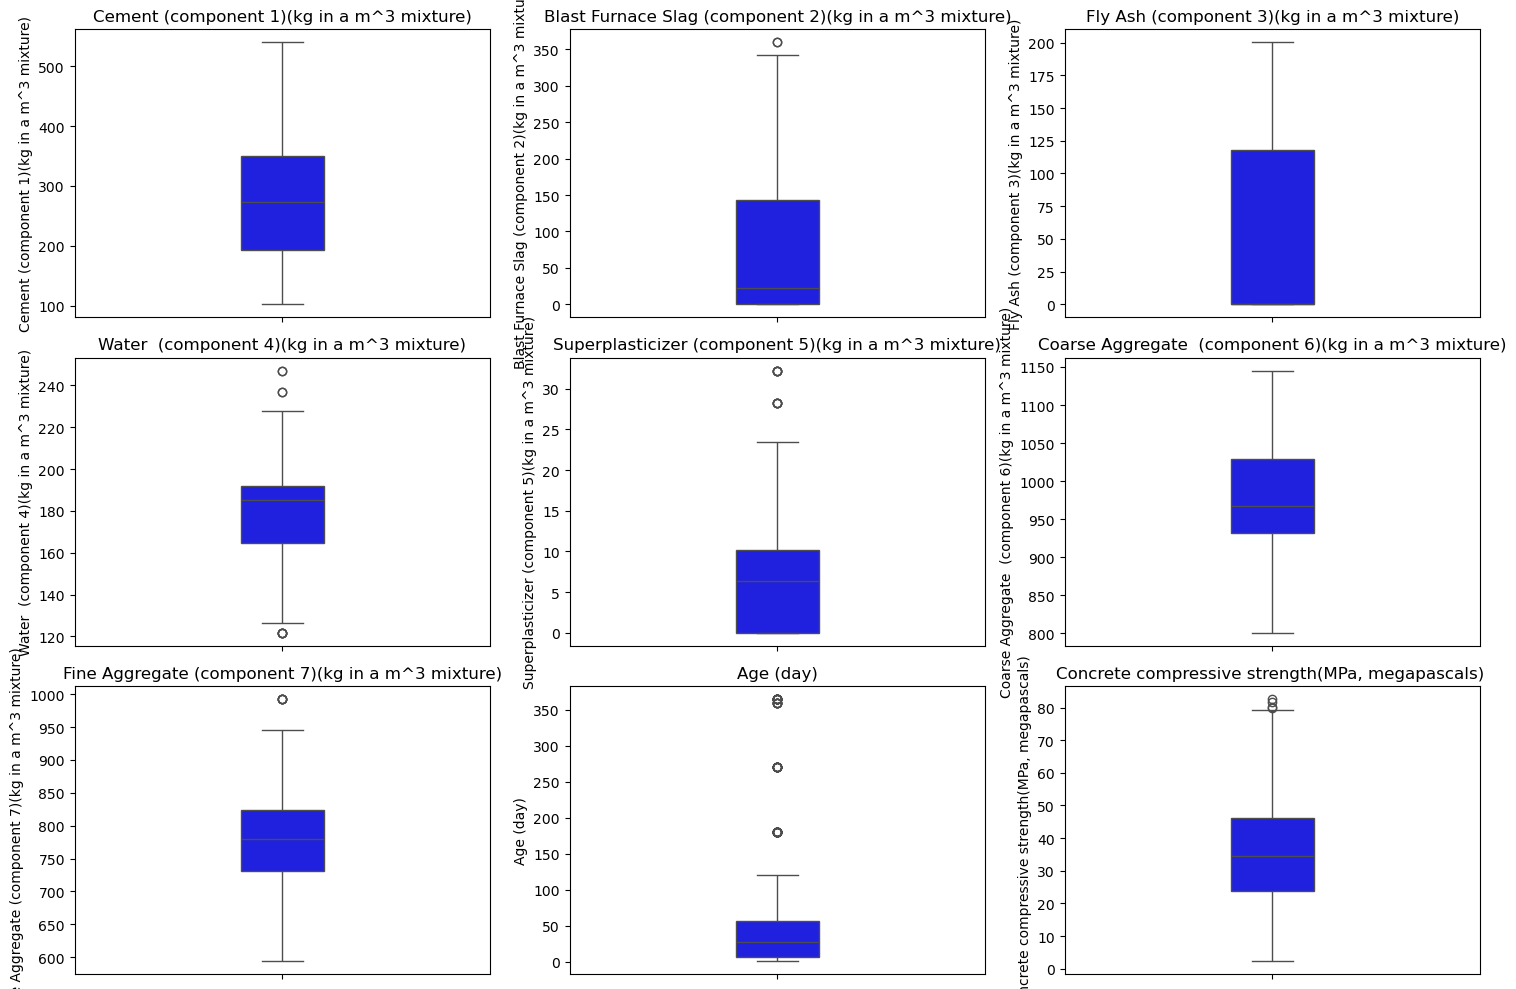

In [10]:
columns_to_plot = [
    "Cement (component 1)(kg in a m^3 mixture)",
    "Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
    "Water  (component 4)(kg in a m^3 mixture)",
    "Superplasticizer (component 5)(kg in a m^3 mixture)",
    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)",
    "Fine Aggregate (component 7)(kg in a m^3 mixture)",
    "Age (day)",
    "Concrete compressive strength(MPa, megapascals) "
]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the columns and create boxplots
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, y=column, color='b', ax=axes[i], width=0.2)
    axes[i].set_title(column)  # Set title for each subplot

# Adjust layout
plt.tight_layout()

# Show grid and save the plot
plt.grid(color='lightgrey', linewidth=0.25, which='minor')
# plt.savefig('boxplot.png')
plt.show()

In [11]:
print(df[columns_to_plot].max(), df[columns_to_plot].min())

Cement (component 1)(kg in a m^3 mixture)                 540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     359.4
Water  (component 4)(kg in a m^3 mixture)                 247.0
Superplasticizer (component 5)(kg in a m^3 mixture)        32.2
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture)         992.6
Age (day)                                                 365.0
Concrete compressive strength(MPa, megapascals)            82.6
dtype: float64 Cement (component 1)(kg in a m^3 mixture)                102.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0.00
Water  (component 4)(kg in a m^3 mixture)                121.80
Superplasticizer (component 5)(kg in a m^3 mixture)        0.00
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     801.00
Fine Aggregate (component 7)(kg in a m^3 mixture)        594.00
Age (day)                                                  1.00
Concrete compressive stre

In [12]:
columns_to_plot = df.columns.tolist()  # Replace with specific column names if needed

# Get max and min values and save them in lists
max_values = df[columns_to_plot].max().tolist()
min_values = df[columns_to_plot].min().tolist()

# Print the lists
print("Max values:", max_values)
print("Min values:", min_values)

Max values: [540.0, 359.4, 200.1, 247.0, 32.2, 1145.0, 992.6, 365.0, 82.6]
Min values: [102.0, 0.0, 0.0, 121.8, 0.0, 801.0, 594.0, 1.0, 2.33]


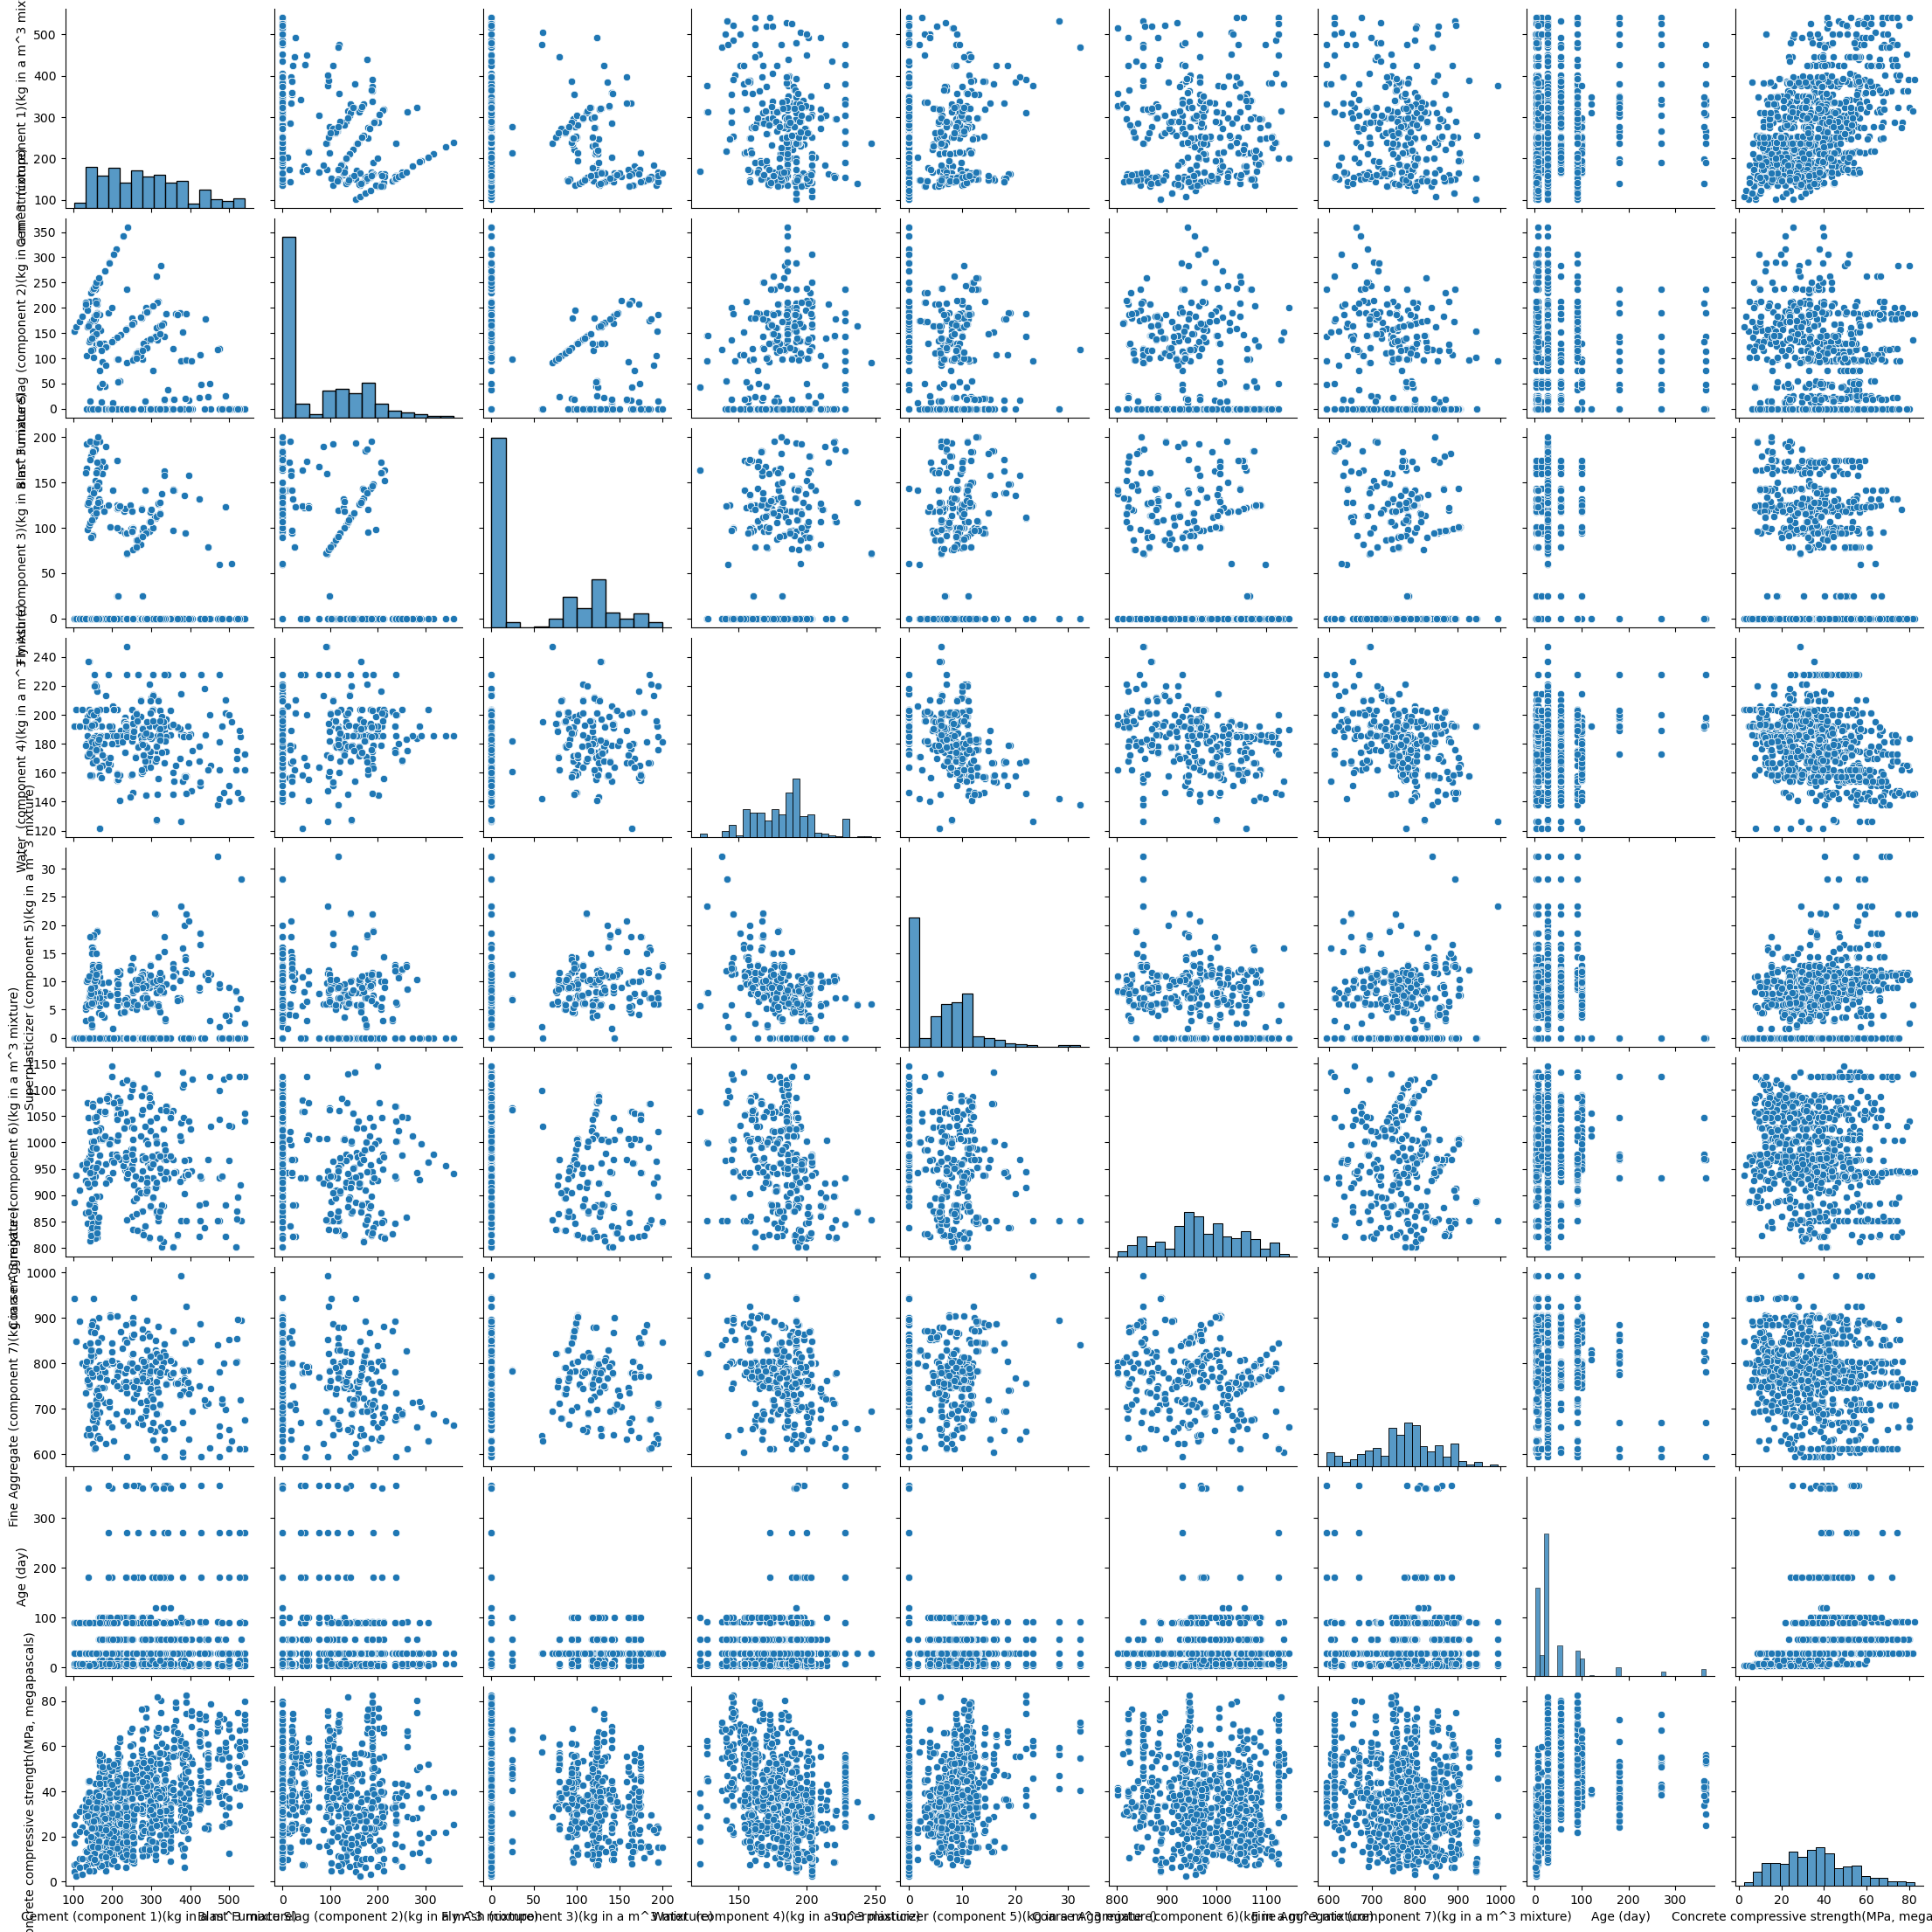

In [13]:
sns.pairplot(df)

## ANN

In [14]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X = df.iloc[:,0:8]  
X = standard_scaler.fit_transform(X)
Y = df.iloc[:,8]
Y = Y.values
Y = Y.reshape(-1, 1)
Y = standard_scaler.fit_transform(Y)

In [15]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=8, activation = 'relu')) # 500 neurons
model.add(Dense(1)) # 1 output neuron

/home/hduser/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile model
model.compile(loss='mean_squared_logarithmic_error', optimizer='adagrad')

# Fit the model
model.fit(X, Y, epochs=500, batch_size=10, verbose=2)

Epoch 1/500
103/103 - 1s - 6ms/step - loss: 0.1565
Epoch 2/500
103/103 - 0s - 1ms/step - loss: 0.1163
Epoch 3/500
103/103 - 0s - 1ms/step - loss: 0.1002
Epoch 4/500
103/103 - 0s - 1ms/step - loss: 0.0919
Epoch 5/500
103/103 - 0s - 1ms/step - loss: 0.0868
Epoch 6/500
103/103 - 0s - 1ms/step - loss: 0.0831
Epoch 7/500
103/103 - 0s - 1ms/step - loss: 0.0805
Epoch 8/500
103/103 - 0s - 1ms/step - loss: 0.0783
Epoch 9/500
103/103 - 0s - 1ms/step - loss: 0.0766
Epoch 10/500
103/103 - 0s - 1ms/step - loss: 0.0750
Epoch 11/500
103/103 - 0s - 1ms/step - loss: 0.0736
Epoch 12/500
103/103 - 0s - 1ms/step - loss: 0.0724
Epoch 13/500
103/103 - 0s - 3ms/step - loss: 0.0712
Epoch 14/500
103/103 - 0s - 1ms/step - loss: 0.0702
Epoch 15/500
103/103 - 0s - 1ms/step - loss: 0.0693
Epoch 16/500
103/103 - 0s - 1ms/step - loss: 0.0684
Epoch 17/500
103/103 - 0s - 1ms/step - loss: 0.0675
Epoch 18/500
103/103 - 0s - 1ms/step - loss: 0.0667
Epoch 19/500
103/103 - 0s - 1ms/step - loss: 0.0660
Epoch 20/500
103/103 

In [17]:
# evaluate the model
scores = model.evaluate(X, Y, verbose = 2)
print(scores)


33/33 - 0s - 5ms/step - loss: 0.0262
0.02624725177884102


In [18]:
predictions = model.predict(X)  
predictions = standard_scaler.inverse_transform(Y)
print(predictions)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[79.99]
 [61.89]
 [40.27]
 ...
 [23.7 ]
 [32.77]
 [32.4 ]]
